## Required libraries

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline

In [2]:
dataset = pd.read_csv('/home/mohit/MLpath/data/digit-recognizer-ii-2023/train.csv')

In [3]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


## Data Preprocessing 

In [9]:
X = dataset.iloc[:,1:]
Y = dataset.iloc[:,:1]

In [10]:
X = X/255.

In [11]:
train = np.array(X)

In [12]:
train = np.reshape(train,(-1,28,28,1))

# EDA

### EDA on Train Data

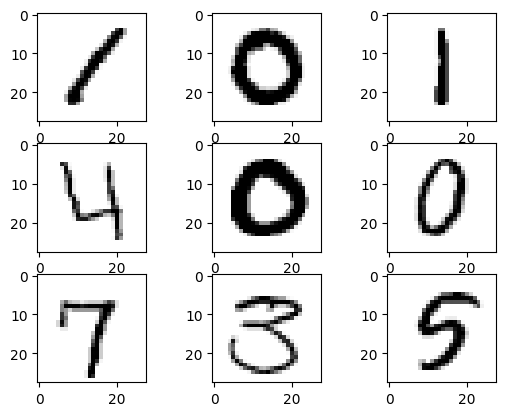

In [13]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train[i],cmap='binary')
plt.show()

### EDA on Test Data

In [19]:
test_dataset = pd.read_csv('/home/mohit/MLpath/data/digit-recognizer-ii-2023/test.csv')

In [20]:
test_dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test_dataset = test_dataset / 255.

In [25]:
test_img = np.array(test_dataset)

In [26]:
np.shape(test_dataset)

(7500, 784)

In [27]:
test_img = np.reshape(test_img,(-1,28,28,1))

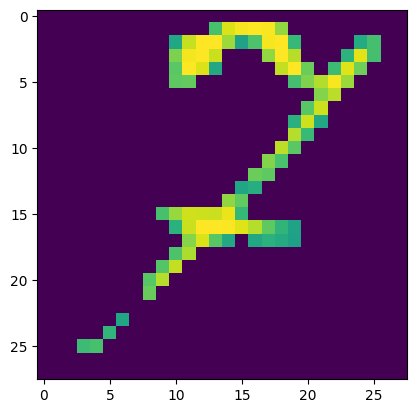

In [31]:
plt.imshow(test_img[1])